<a href="https://colab.research.google.com/github/yujiimt/time_series/blob/master/time_series_book/ARmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics import tsaplots

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = "https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv"

In [3]:
df_ice = pd.read_csv(path, encoding="shift-jis",header=1)

In [4]:
df_ice = df_ice.reset_index()
df_ice = df_ice.drop(columns="index", axis=1)

In [5]:
#次ごとの家庭平均消費額のみを抽出し、２００３年１月からの月ごとにする
y = pd.Series(df_ice.アイスクリーム.values, 
              index = pd.date_range('2003-1', periods=len(df_ice),freq='M'))

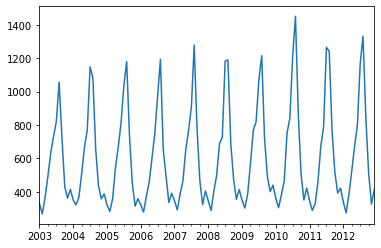

In [6]:
y.plot()

In [7]:
# トレンド項あり（２次まで）、定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり（1次まで）、定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし、定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし、定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")

print("ctt : ")
print(ctt)
print("ct : ")
print(ct)
print("c : ")
print(c)
print("nc : ")
print(nc)


ctt : 
(-3.3089558508822066, 0.1692244861968651, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
ct : 
(-1.714560199971079, 0.7444294601457553, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c : 
(-0.6539247687694223, 0.8583259363632658, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc : 
(1.6310949179759076, 0.9751761218376866, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


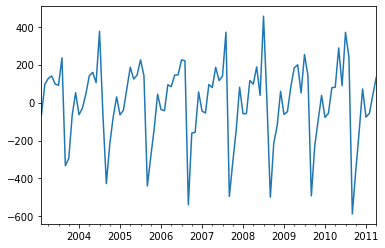

In [8]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [9]:
# トレンド項あり（２次まで）、定数項ありの場合
ctt = stattools.adfuller(y_diff[:100], regression="ctt")
# トレンド項あり（1次まで）、定数項ありの場合
ct = stattools.adfuller(y_diff[:100], regression="ct")
# トレンド項なし、定数項ありの場合
c = stattools.adfuller(y_diff[:100], regression="c")
# トレンド項なし、定数項なしの場合
nc = stattools.adfuller(y_diff[:100], regression="nc")

print("ctt : ")
print(ctt)
print("ct : ")
print(ct)
print("c : ")
print(c)
print("nc : ")
print(nc)

ctt : 
(-20.49413879057406, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214956)
ct : 
(-20.51282538674093, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902557)
c : 
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415186)
nc : 
(-20.337724459102365, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068397)


In [10]:
model = ar_model.AR(y_diff)

In [11]:
for i in range(20):
  results = model.fit(maxlag=i+1)
  print("lag = ", i + 1, "aic : ", results.aic)

lag =  1 aic :  10.623349835083612
lag =  2 aic :  10.605625887136187
lag =  3 aic :  10.631794365499909
lag =  4 aic :  10.653968819566964
lag =  5 aic :  10.639020494849978
lag =  6 aic :  10.497805079154896
lag =  7 aic :  10.50164556083358
lag =  8 aic :  10.347418412668333
lag =  9 aic :  10.145773136713263
lag =  10 aic :  9.547393191591683
lag =  11 aic :  8.688494352586085
lag =  12 aic :  8.726168706454176
lag =  13 aic :  8.749080458269447
lag =  14 aic :  8.787463716774608
lag =  15 aic :  8.822181088075927
lag =  16 aic :  8.861619646480914
lag =  17 aic :  8.900710667979508
lag =  18 aic :  8.712739176754758
lag =  19 aic :  8.74636247304398
lag =  20 aic :  8.766450545272324


In [12]:
# モデルのあてはめ
results11 = model.fit(maxlag=12, ic='aic')
results.k_ar

20

<BarContainer object of 88 artists>

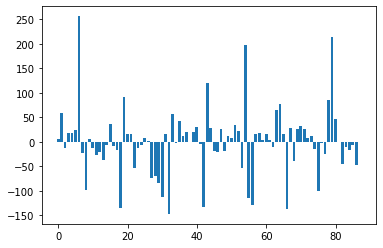

In [13]:
#残差
res11 = results11.resid
#残差の出力
plt.bar(range(len(res11)), res11)

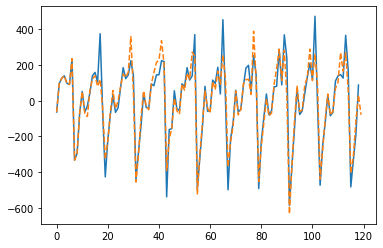

In [14]:
# 現系列の表示
plt.plot(y.diff().dropna().values, label="observation")
#1時点から11時点の原系列、モデルのあてはめに使用したデータ、
#AR(11)モデルによる推定値を連結した結果の表示
plt.plot(np.hstack([y_diff[:11],
                    results11.fittedvalues,
                    results11.predict(98-11, 107, dynamic=True)]),
                    "--", label="forecast")

In [15]:
# 次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
# AICはBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

((2, 2), (2, 2))

<BarContainer object of 99 artists>

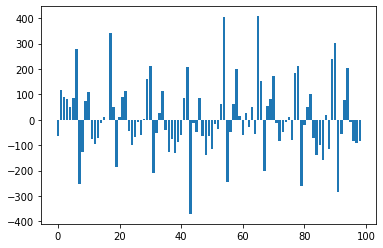

In [16]:
# p=4, p=2, のARIMAモデルのインスタンスを生成
model = ARMA(y_diff, (2,2))
# y_diff に対してモデルを当てはめる
results = model.fit()

#残差の出力
res = results.resid
#残差の出力
plt.bar(range(len(res)), res)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


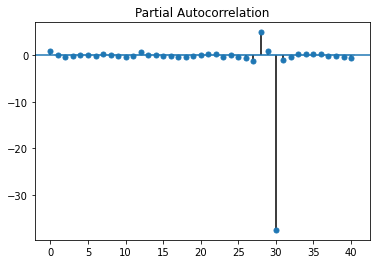

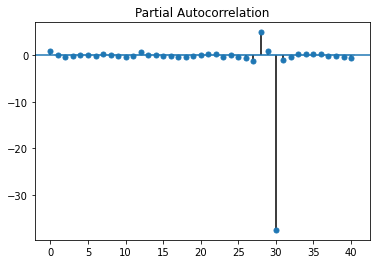

In [17]:
# 残差の偏自己相関
tsaplots.plot_pacf(res, lags=40)

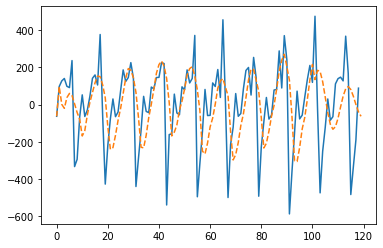

In [18]:
#1次階差系列の表示
plt.plot(y.diff().dropna().values, label="observation")
#ARMAによる推定値の表示
plt.plot(np.hstack([y_diff[:2],
                    results.fittedvalues,
                    results.predict(99-2, 115, dynamic=True)]),
         "--", label="forecast")

In [19]:
url = "https://www.analyticsvidhya.com//wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode("utf-8")))

df_content = content.copy()

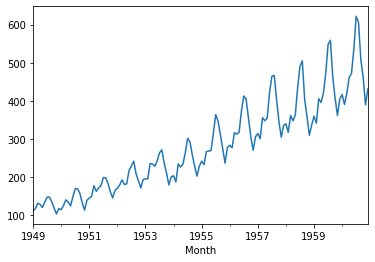

In [20]:
df_content["Month"] = pd.to_datetime(df_content["Month"],
                                     infer_datetime_format=True)

y = pd.Series(df_content["#Passengers"].values, index=df_content["Month"])
y = y.astype('f')
y.plot()

In [21]:
len(df_content)

144

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<BarContainer object of 119 artists>

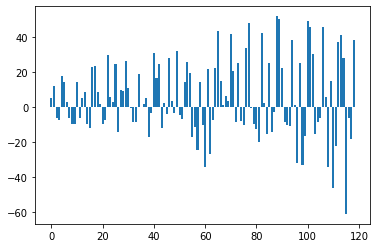

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# yは上のコードで取得した月ごとの旅客機の乗客数データ
y120 = y[:120]

model_d0 = ARIMA(y120, (3, 0, 2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid

#残差の出力
plt.bar(range(len(res_d0[1:])),res_d0[1:] )

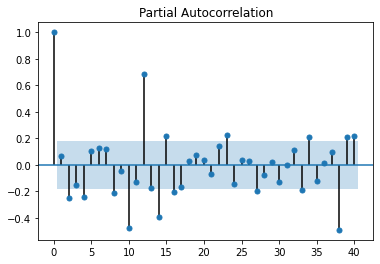

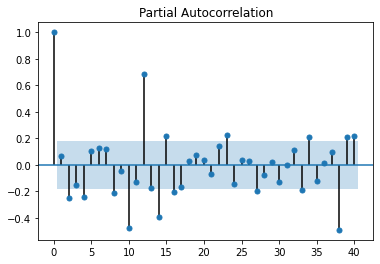

In [23]:
tsaplots.plot_pacf(res_d0[1:], lags=40)

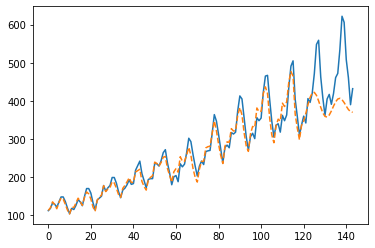

In [24]:
#原系列の表示
plt.plot(y.values, label="observation")

plt.plot(results_d0.predict(1, len(y)).values,
         "--", label="forecast")

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<BarContainer object of 119 artists>

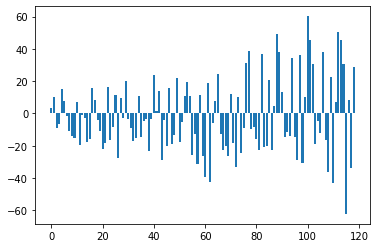

In [25]:
model_d1= ARIMA(y120, (4,1,1))
results_d1 = model_d1.fit()
res_d1 = results_d1.resid

#残差の出力
plt.bar(range(len(res_d1)), res_d1)

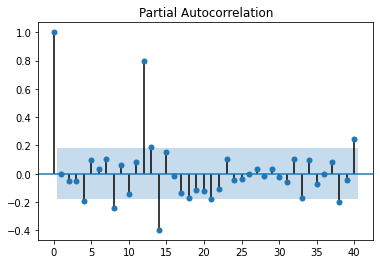

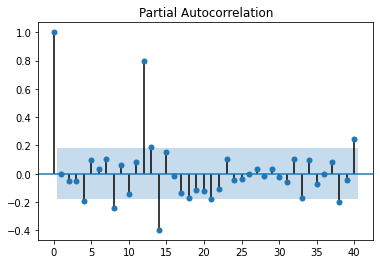

In [26]:
tsaplots.plot_pacf(res_d1, lags=40)

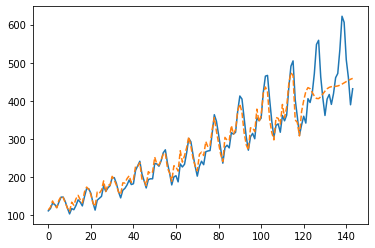

In [27]:
#原系列の表示　
plt.plot(y.values, label="observation")

plt.plot(results_d1.predict(1, len(y), typ='levels').values,
         "--", label="forecast")

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<BarContainer object of 120 artists>

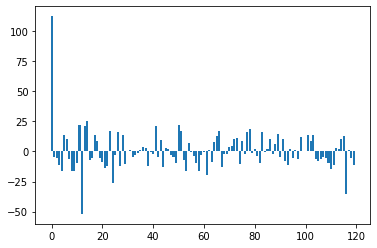

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


p, d, q, sp, sd, sq = 2, 1, 2, 1, 1,1
seasonal = 12

result = SARIMAX(
    y120, order=(p,d,q),
    seasonal_order = (sp, sd, sq, seasonal),
    enforce_stationarity = False,
    enforce_invertibility = False
).fit()


# 残差の抽出
res = result.resid
#　残差の出力
plt.bar(range(len(res)), res)

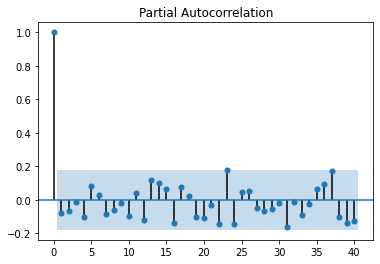

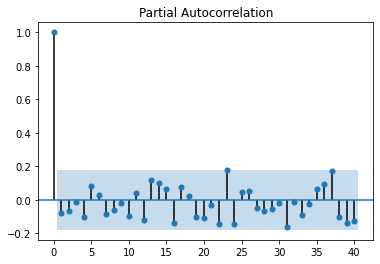

In [30]:
tsaplots.plot_pacf(res, lags=40)

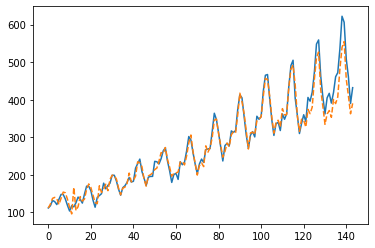

In [31]:
plt.plot(y.values, label="observation")
plt.plot(np.hstack([y120[0],
                   result.fittedvalues[1:],
                   result.forecast(24)]),
                  "--", label = "forecast")